Katherine Camacho Calderon
# Práctica 1

Conociendo los datos con los que vamos a trabajar.
Antes de comenzar incluso a preprocesar los datos, debemos conocer las características del conjunto de datos que tenemos.

Como mínimo debemos saber:
-  Cuántos registros hay?
-  Cuantos atributos tiene cada registro?
-  De qué tipo son los atributos?

Además:
-  Obtener una medida de centralidad para cada atributo
-  Obtener una medida de dispersión o desviación para los atributos que ésto tenga sentido
-  Calcular la matriz de correlación de los atributos de entrada para identificar atributos redundantes

Como paso previo al preprocesamiento de los datos, debemos:
-  Detectar si hay datos faltantes (determinar en qué columnas y cuantos datos faltan en un mismo registro)
-  Detectar si hay datos atípicos
-  Detectar si hay desbalance entre clases

Notar que en esta etapa no hacemos ninguna modificación sobre los datos, sólo estamos conociéndolos a fondo para saber con qué material contamos para trabajar.

Enero de 2020


In [2]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")

#Ponemos nombre a las columnas (Esta información se toma del archivo original adult.names que está en el 
#repositorio junto con el archivo de datos)
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

In [4]:
#Cual es el tipo de los atributos?
data. dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hpw                int64
Country           object
C                 object
dtype: object

In [5]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


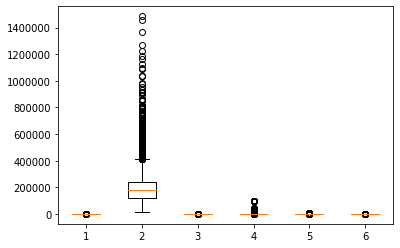

In [6]:
#Diagrama de cajas y bigotes para atributos numéricos

plt.boxplot((data['Age'],data['Fnlwgt'],data['Education-num'],data['Capital-gain'],data['Capital-loss'], data['Hpw']))
plt.show()

In [7]:
#Medidas de centralidad para atributos categóricos:
data.mode()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.corr()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hpw,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


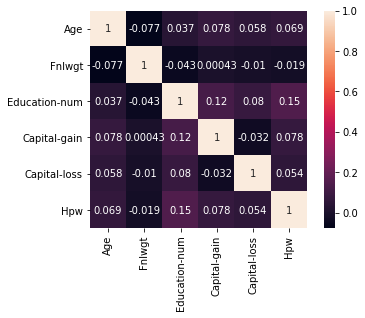

In [9]:
sns.heatmap(data.corr(), square=True, annot=True)

In [10]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

3

In [11]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hpw                  0
Country            583
C                    0
dtype: int64

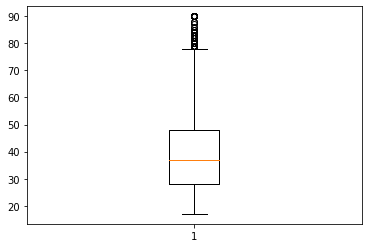

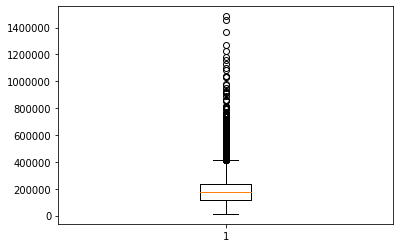

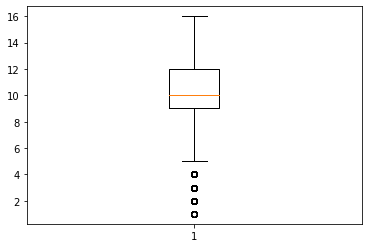

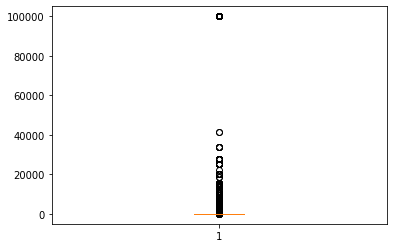

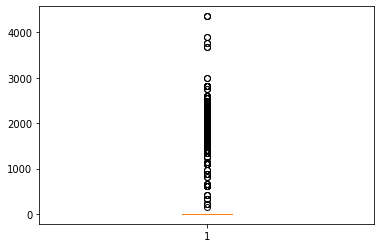

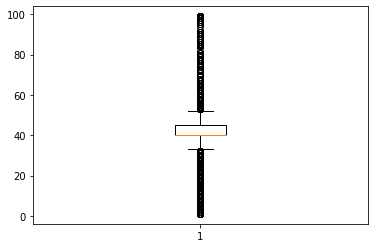

In [12]:
#En qué atributos hay datos atípicos?
plt.boxplot(data['Age'])
plt.show()
plt.boxplot(data['Fnlwgt'])
plt.show()
plt.boxplot(data['Education-num'])
plt.show()
plt.boxplot(data['Capital-gain'])
plt.show()
plt.boxplot(data['Capital-loss'])
plt.show()
plt.boxplot(data['Hpw'])
plt.show()


In [13]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['C'].value_counts())

 <=50K    24720
 >50K      7841
Name: C, dtype: int64


In [14]:
df = pd.DataFrame(data=data)
df

#df.Workclass = df.Workclass.replace({NaN:"Private"})
#df.Occupation= df.Occupation.replace({NaN:"Prof-specialty"})
#df.Country = df.Country.replace({NaN:str("United-States")})
#df.describe()
#se reemplazan los NaN por la moda de los datos en cada uno de los campos
df["Workclass"].fillna("Private", inplace = True)
df["Occupation"].fillna("Prof-specialty", inplace = True)
df["Country"].fillna("United-States", inplace = True)
df.describe()
df
#max(data.isnull().sum(axis=1))
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
data['Country'] = labelencoder.fit_transform(data['Country'])
data['Occupation'] = labelencoder.fit_transform(data['Occupation'])
data['Workclass'] = labelencoder.fit_transform(data['Workclass'])
data['Education'] = labelencoder.fit_transform(data['Education'])
data['Marital-status'] = labelencoder.fit_transform(data['Marital-status'])
data['Relationship'] = labelencoder.fit_transform(data['Relationship'])
data['Race'] = labelencoder.fit_transform(data['Race'])
data['Sex'] = labelencoder.fit_transform(data['Sex'])
data['C'] = labelencoder.fit_transform(data['C'])
df
data.describe()
#data.mode()
#data
data.drop('C', axis=1).corr()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country
Age,1.000000,0.059423,-0.076646,-0.010508,0.036527,-0.266288,0.012626,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176
Workclass,0.059423,1.000000,-0.019164,-0.019375,-0.054350,0.042236,0.312511,0.012817,0.018913,0.002306,0.010687,-0.009888,-0.093411,0.001253
Fnlwgt,-0.076646,-0.019164,1.000000,-0.028145,-0.043195,0.028153,-0.000521,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.062710
Education,-0.010508,-0.019375,-0.028145,1.000000,0.359153,-0.038407,-0.046443,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.075186
Education-num,0.036527,-0.054350,-0.043195,0.359153,1.000000,-0.069304,0.044096,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.090277
Marital-status,-0.266288,0.042236,0.028153,-0.038407,-0.069304,1.000000,0.052847,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.020456
Occupation,0.012626,0.312511,-0.000521,-0.046443,0.044096,0.052847,1.000000,-0.014625,-0.009966,0.026116,0.012350,0.004540,-0.056995,-0.000479
Relationship,-0.263698,0.012817,0.008931,-0.010876,-0.094153,0.185451,-0.014625,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010940
Race,0.028718,0.018913,-0.021291,0.014131,0.031838,-0.068013,-0.009966,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.111296
Sex,0.088832,0.002306,0.026858,-0.027356,0.012280,-0.129314,0.026116,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.003013


# Análisis de los Resultados
K
Escribir aquí las conclusiones obtenidas del análisis del conjunto de datos.
-   El conjunto de datos es viable?
    Si, el conjunto de datos permite obtener información valiosa, pues no presenta una cantidad  de datos faltantes significativa.
  
-   Cuáles son las dificultades más significativas que tiene el conjunto de datos?
    Pienso que una de las dificultades más significativas es el desbalance y los datos atípicos que aunque no sabemos si realmente contribuyen o no, puede que más adelante los             resultados que genere no sean correctos ya sea porque no hay suficiente información o porque la información que hace parte del conjunto de datos sea errónea.

-   Es necesario eliminar atributos?
    No, gracias a la gráfica de correlación se puede entender que los atributos no me generan información redundate, por lo que todos contribuyen en el resultado.
    
-   Es necesario eliminar registros?
    No, porque no hay un registro al cual le falten una cantidad significativa de datos, la máxima cantidad de datos faltantes en un registro es 3 lo que representa que no hay razón       suficiente para eliminarlo, pues es de gran ayuda el registro.
    
-   Se van a reemplazar los valores nulos por algún valor?
    Si, pienso que es conveniente reemplazar dichos valores por la media, ya que eliminarlos significaría perdida de datos, pues dichos datos faltantes se encuentran en registros que       contienen una numerosa información y que son indispensables para el modelo.
    
-   Cómo se van a manejar los datos atípicos?
    Por ahora pienso que lo ideal es no manipularlos, y definir un criterio respecto a estos más adelante cuando se puedan estudiar si dichos datos atípicos pueden contribuir o no en       la investigación 
    
-   Es necesario normalizar los valores de los atributos?
    Si, pienso que es necesario para que durante el desarrollo sea más fácil clasificarlos y por ende estudiarlos, así se tendría un mayor orden y visibilidad de los datos.

-   Están los datos desbalanceados?
    No, el análisis me indica que hay una gran cantidad de datos que me generan un resultado en particular, mientras que existe otra cantidad que es mínima que genera otro resultado,       es necesario que ambos conjuntos que generan resultados diferentes sean aproximadamente de tamaños iguales. 
    
   >>Plan
   
   - Balancear los datos
   - Estudiar los datos atípicos para entender si realmente contribuirán o no a los resultados.